In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('AI_data.csv')
data = data.iloc[:, 1:]
data

FileNotFoundError: [Errno 2] File AI_data.csv does not exist: 'AI_data.csv'

In [6]:
# split X and y
X = data.iloc[:, :357]
y = data.iloc[:, 357:361]
N = X.shape[0]
p = X.shape[1]

# split train and test
np.random.seed(2021)
training_idx = np.random.choice(np.arange(N), size = int(N * 0.8), replace = False)
testing_idx = np.delete(np.arange(N), training_idx)
X_train = X.iloc[training_idx, :]
y_train = y.iloc[training_idx, :]
X_test = X.iloc[testing_idx, :]
y_test = y.iloc[testing_idx, :]

In [66]:
from sklearn.ensemble import RandomForestClassifier
question = 3
y_train_q = y_train.iloc[:, question]
weight = np.ones(int(N * 0.8))
weight[y_train_q == 1] = (N * 0.8) * 2.1 / sum(y_train_q == 1)
weight[y_train_q == 2] = (N * 0.8) / sum(y_train_q == 2)
weight[y_train_q == 3] = (N * 0.8) * 1.7 / sum(y_train_q == 3)

clf = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 5, random_state = 0,
                             criterion = 'entropy')

clf.fit(X_train, y_train.iloc[:, question], sample_weight = weight)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [67]:
np.mean(pred_train == y_train.iloc[:, question]), np.mean(pred_test == y_test.iloc[:, question])

(0.9589259219049687, 0.6309618585800101)

In [68]:
np.mean(pred_test == 3)

0.16139538249981905

In [69]:
np.mean(y.iloc[:, question] == 3)

0.18920718555939955

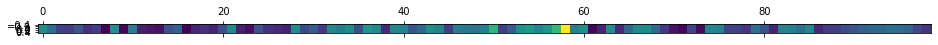

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(clf.feature_importances_.reshape((1, -1))[:, 1:100])

In [300]:
# build model
y_train_1 = np.array(y_train.iloc[:, 3]) - 1
y_test_1 = np.array(y_test.iloc[:, 3]) - 1

weight = np.ones(int(N * 0.8))
weight[y_train_1 == 0] = (N * 0.8) / sum(y_train_1 == 0)
weight[y_train_1 == 1] = (N * 0.8) / sum(y_train_1 == 1)
weight[y_train_1 == 2] = (N * 0.8) / sum(y_train_1 == 2)

In [348]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, 
                          activation = 'softmax', 
                          input_shape = (p, ), 
                          kernel_regularizer = tf.keras.regularizers. L1L2(l1 = 0, l2 = 0))
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(X_train, y_train_1, epochs = 100, batch_size = 1024, verbose = 2, class_weight = {0: 1 / sum(y_train_1 == 0), 
                                                                                            1: 1 / sum(y_train_1 == 1), 
                                                                                            2: 1 / sum(y_train_1 == 2)})

Epoch 1/100
 - 1s - loss: 10.6204 - acc: 0.0833
Epoch 2/100
 - 0s - loss: 10.5291 - acc: 0.1662
Epoch 3/100
 - 0s - loss: 10.4520 - acc: 0.1318
Epoch 4/100
 - 0s - loss: 10.6042 - acc: 0.1931
Epoch 5/100
 - 0s - loss: 10.6018 - acc: 0.1934
Epoch 6/100
 - 0s - loss: 10.6015 - acc: 0.1937
Epoch 7/100
 - 0s - loss: 10.5977 - acc: 0.1937
Epoch 8/100
 - 0s - loss: 10.5962 - acc: 0.1935
Epoch 9/100
 - 0s - loss: 10.5921 - acc: 0.1935
Epoch 10/100
 - 0s - loss: 10.5830 - acc: 0.1932
Epoch 11/100
 - 0s - loss: 10.4292 - acc: 0.1831
Epoch 12/100
 - 0s - loss: 10.6346 - acc: 0.0819
Epoch 13/100
 - 0s - loss: 10.6255 - acc: 0.0854
Epoch 14/100
 - 0s - loss: 10.6158 - acc: 0.0861
Epoch 15/100
 - 0s - loss: 10.6205 - acc: 0.0859
Epoch 16/100
 - 0s - loss: 10.6118 - acc: 0.0858
Epoch 17/100
 - 0s - loss: 10.6109 - acc: 0.0857
Epoch 18/100
 - 0s - loss: 10.6160 - acc: 0.0860
Epoch 19/100
 - 0s - loss: 10.6106 - acc: 0.0862
Epoch 20/100
 - 0s - loss: 10.6118 - acc: 0.0862
Epoch 21/100
 - 0s - loss: 10

KeyboardInterrupt: 

In [344]:
pred = model.predict(X_test)

In [345]:
pred = np.argmax(pred, 1)

In [346]:
sum(pred == 0), sum(pred == 1), sum(pred == 2), sum(pred == 3)

(13648, 123, 46, 0)

In [347]:
sum(y_test_1 == 0), sum(y_test_1 == 1), sum(y_test_1 == 2), sum(y_test_1 == 3)

(1119, 10156, 2542, 0)

In [322]:
np.mean(pred == y_test_1)

0.7317796916841572

In [323]:
weight

array([ 5.24896951, 12.61214058,  1.36950564, ...,  1.36950564,
        1.36950564,  1.36950564])